# OmegaOCR

Toàn bộ source code được đặt tại: https://gitlab.com/pikachu-ai/omegaocr

Các phần được thực hiện trên jupyter notebook nằm trong file này.

## OCR Seq2Seq Model Training

In [ ]:
# cd /content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_and_json # Data already created

In [ ]:
# !unzip /content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_and_json/data_labeled_ggocr.zip # Data already created

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image
import os
import cv2
import json
! pip install --quiet vietocr==0.3.2
from vietocr.tool.predictor import Predictor
from vietocr.model.trainer import Trainer
from vietocr.tool.config import Cfg
from glob import glob
import re

     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 880kB 12.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 952kB 18.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.


In [ ]:
import numpy as np

In [ ]:
# cd /content/drive/MyDrive/Colab/omegaocr_seq2seq/run2/lines # Data already created

# **CREATE FOLDER OF LINE IMAGES AND TEXT FILE OF LABELS.**

In [ ]:
# Data already created
# # Create data (pictures of lines) from image and json file

# image_list = glob('/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_and_json/data_labeled_ggocr/*.jpg')
# label_file = open('images_all_labels.txt','w+')
# image_counts = 0

# # Make sure pwd = lines/

# for image_path in image_list[:300]:
#     image_counts += 1
#     json_path = image_path.replace('.jpg', '_lines.json')
#     img = cv2.imread(image_path)
#     f = open(json_path,'r')
#     data = json.load(f)

#     for i in range(len(data)):

#         # Giả sử tọa độ của bounding box được cho bởi 4 góc
#         # [x1,y1,x2,y2,x3,y3,x4,y4] theo chiều kim đồng hồ
#         x_low = data[i]['boundingBox'][0]
#         y_low = data[i]['boundingBox'][1]
#         x_high = data[i]['boundingBox'][2]
#         y_high = data[i]['boundingBox'][7]

#         label = data[i]['text']

#         # Quy tắc tọa độ của numpy và image là transpose của nhau
#         # Numpy quy ước chiều đầu tiên là chiều dọc
#         # Image quy ước chiều đầu tiên là chiều ngang.
#         try:
#             sub_img = img[y_low:y_high, x_low:x_high]
#             fname = 'image' + str(image_counts) + '_line' + str(i) + '.png'
#             label_file.write(f'{fname}\t{label}\n')
#             cv2.imwrite(fname, sub_img)
#         except Exception as e:
#             # print(e)
#             # print(y_low,y_high, x_low,x_high)
#             # break
#             pass
# label_file.close()

# **TRAIN**

In [ ]:
# Đã xử lý
# # Xử lý string trong các file label....

# vocab = """aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ """

# f = open('images_all_labels.txt','r')
# lines = f.readlines()

# total_str = ''
# for line in lines:
#     line = line.rstrip('\n')
#     total_str = total_str + line.split('\t')[1]
# total_str = ''.join(set(total_str))
# extra_str = ''
# for char in total_str:
#     if char not in vocab:
#         extra_str += char
# extra_str

In [ ]:
# def extra_str_process(s):
#     """
#     Input: string s
    
#     The function considers each character c in s that belongs to extra_str.
#     Then it does one of the following:
#     - If c is VERY different from vocab, then c is removed.
#     - Else, c is VERY similar to a character c' in vocab, then c is replaced with c'

#     Returns: processed string that only contains characters in vocab.
#     """
#     for i in range(len(s)):
#         if s[i] in extra_str:
#             if s[i] in ['Н','н','Η']:
#                 s[i] = 'H'
#             elif s[i] in ['О','Ο']:
#                 s[i] = 'O'
#             elif s[i] in ['Т','т','Τ']:
#                 s[i] = 'T'
#             elif s[i] in ['в','В','Β']:
#                 s[i] = 'B'

In [ ]:
# Already done
# cleaned_label = open('images_all_labels_clean.txt','w+')
# for line in lines:
#     contain_extra = False
#     for char in extra_str:
#         if char in line:
#             contain_extra = True
#             break
#     if not contain_extra:
#         cleaned_label.write(line) 
# cleaned_label.close()

In [ ]:
# Create seq2seq config for trainer

config = Cfg.load_config_from_name('vgg_seq2seq')
dataset_params = {
    'name':'hw',
    'data_root':'/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/lines',
    'train_annotation':'/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_train_labels_clean.txt',
    'valid_annotation':'/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_valid_labels_clean.txt'
}

params = {
         'print_every':200,
          'valid_every':5*200,
          'iters':20000,
          'checkpoint':'./checkpoint/seq2seq_checkpoint.pth',    
          'export':'./weights/seq2seq.pth',
          'metrics':100
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [ ]:
# Create trainer for training

trainer_seq2seq = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
To: /root/.cache/gdown/tmpocs2icvl/dl
89.6MB [00:01, 47.0MB/s]


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


Create train_hw: 100%|████████████████████████████████████████| 8275/8275 [1:24:03<00:00,  1.64it/s]

Remove 39 invalid images
Created dataset with 8235 samples



Create valid_hw: 100%|██████████████████████████████████████████| 2473/2473 [24:45<00:00,  1.66it/s]

Remove 9 invalid images
Created dataset with 2463 samples



valid_hw build cluster: 100%|███████████████████████████████| 2463/2463 [00:00<00:00, 121689.31it/s]


In [ ]:
# Start training

trainer_seq2seq.train()

iter: 000200 - train loss: 0.887 - lr: 6.35e-05 - load time: 0.55 - gpu time: 92.75
iter: 000400 - train loss: 0.835 - lr: 1.32e-04 - load time: 0.42 - gpu time: 86.15
iter: 000600 - train loss: 0.820 - lr: 2.38e-04 - load time: 0.40 - gpu time: 96.20
iter: 000800 - train loss: 0.800 - lr: 3.72e-04 - load time: 0.52 - gpu time: 85.06
iter: 001000 - train loss: 0.797 - lr: 5.20e-04 - load time: 0.57 - gpu time: 90.16
iter: 001000 - valid loss: 0.787 - acc full seq: 0.6562 - acc per char: 0.9301
iter: 001200 - train loss: 0.789 - lr: 6.69e-04 - load time: 0.44 - gpu time: 88.53
iter: 001400 - train loss: 0.789 - lr: 8.03e-04 - load time: 0.03 - gpu time: 88.22
iter: 001600 - train loss: 0.790 - lr: 9.09e-04 - load time: 0.49 - gpu time: 89.98
iter: 001800 - train loss: 0.790 - lr: 9.77e-04 - load time: 0.50 - gpu time: 87.62
iter: 002000 - train loss: 0.775 - lr: 1.00e-03 - load time: 0.42 - gpu time: 86.82
iter: 002000 - valid loss: 0.787 - acc full seq: 0.6094 - acc per char: 0.9204
it

# **INFER**

In [ ]:
pwd

'/content/drive/MyDrive/Colab/vietocr_seq2seq/run2'

In [ ]:
# Create predictor for inference

config['weights'] = './weights/seq2seq.pth' # Use same config as above, but load in trained weights.
config['cnn']['pretrained'] = False
config['device'] = 'cuda:0'
config['predictor']['beamsearch'] = False

# Config below is for untrained model
# cfg_seq2seq = Cfg.load_config_from_name('vgg_seq2seq')
# cfg_seq2seq['cnn']['pretrained']=False
# cfg_seq2seq['device'] = 'cuda:0'
# cfg_seq2seq['predictor']['beamsearch']=False

pred_seq2seq = Predictor(config)

In [ ]:
# Prediction

test_file_text = '/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/images_test_labels_clean.txt'
test_file_img = '/content/drive/MyDrive/Colab/vietocr_seq2seq/run2/lines'

f = open(test_file_text,'r')
lines = f.readlines()
num_test = 0
total_wer = 0.0
total_cer = 0.0

for line in lines:
    line = line.rstrip('\n')
    fname = line.split('\t')[0]
    content = line.split('\t')[1]
    try:
        img = Image.open(os.path.join(test_file_img,fname))
    except:
        continue
    s = pred_seq2seq.predict(img)
    total_wer += WER(s, content)
    total_cer += CER(s, content)
    num_test += 1

average_wer = total_wer / num_test
average_cer = total_cer / num_test

In [ ]:
print('Average WER: ',average_wer)
print('Average CER: ',average_cer)

Average WER:  0.06443835438108156
Average CER:  0.030868009493607462


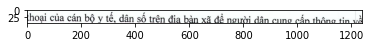

thoại của cán bộ y tế, dân số trên địa bàn xã để người dân cung cấp thông tin về


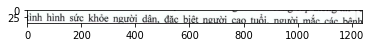

tình hình sức khỏe người dân, đặc biệt người cao tuổi, người mặc các bệnh


không lây nhiễm. Thực hiện dinh dưỡng tăng cường sức khỏe cho các đối tương


người cao tuổi theo các hướng dẫn.


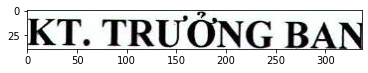

KT. TRƯỞNG BAN


PHÓ TRƯỞNG BAN CHÍ ĐÀO


Nơi nhận:


- Như Kính gửi:


- Thủ tướng Chính phủ (để báo cáo);


- PTTg. Vũ Đức Đam (để báo cáo);


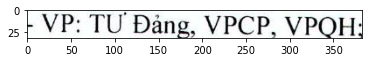

- VP: TƯ Đảng, VPCP, VPQH;


- Thành viên BCĐ QG về PCD COVID-19;


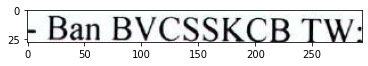

- Ban BVCSSKCB TW;


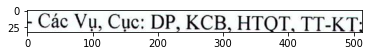

- Các Vụ, Cục: DP, KCB, HTQT, TT-KT;


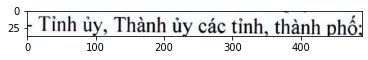

- Tỉnh ủy, Thành ủy các tỉnh, thành phố;


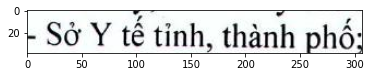

- Sở Y tế tỉnh, thành phố;


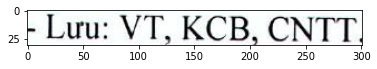

- Lưu: VT, KCB, CNTT.


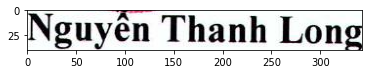

Nguyễn Thanh Long


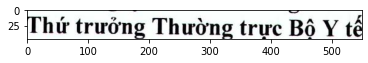

Thứ trưởng Thường trực Bộ Y tế


2


In [ ]:
for line in lines[:20]:
    line = line.rstrip('\n')
    fname = line.split('\t')[0]
    content = line.split('\t')[1]
    try:
        img = Image.open(os.path.join(test_file_img,fname))
    except:
        continue
    s = pred_seq2seq.predict(img)
    plt.imshow(img)
    plt.show()
    print(s)

In [19]:
num_test

1166

In [ ]:
# WER and CER functions

def WER(hypo:str, ref:str):
    """
    Inputs:
        - hypo: predicted string from ocr
        - ref: correct string
    Returns (float) Word Error Rate between 2 strings
    """
    # Splits str to list of words 
    hypo = hypo.split()
    ref = ref.split()

    h = len(hypo)
    r = len(ref)
    D = np.zeros((r+1, h+1))
    D[0,:] = np.arange(h+1)
    D[:,0] = np.arange(r+1)
    for i in range(1,r+1):
        for j in range(1,h+1):
            if ref[i-1] == hypo[j-1]:
                D[i,j] = D[i-1,j-1]
            else:
                D[i,j] = min(D[i-1,j-1], D[i-1,j], D[i,j-1]) + 1
    return D[r,h]/r

def CER(hypo:str, ref:str):
    """
    Inputs:
        - hypo: predicted string from ocr
        - ref: correct string
    Returns (float) Character Error Rate between 2 strings
    """
    # No need to split strings to list of words.
    # hypo = hypo.split()
    # ref = ref.split()

    h = len(hypo)
    r = len(ref)
    D = np.zeros((r+1, h+1))
    D[0,:] = np.arange(h+1)
    D[:,0] = np.arange(r+1)
    for i in range(1,r+1):
        for j in range(1,h+1):
            if ref[i-1] == hypo[j-1]:
                D[i,j] = D[i-1,j-1]
            else:
                D[i,j] = min(D[i-1,j-1], D[i-1,j], D[i,j-1]) + 1
    return D[r,h]/r